<a href="https://colab.research.google.com/github/gulabpatel/Anomaly_Detection_Python/blob/main/2.2_Anomaly_Detection_using_Isolation_Forest_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![link text](https://www.anblicks.com/wp-content/uploads/2020/11/contextual-outlier.png)

Image Source: anblick.com

Video help for the code : https://www.youtube.com/watch?v=XCF-kqCB_vA&list=PL3N9eeOlCrP5DflJUcymWEKhfhLx2MhRO&index=5

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

from sklearn.ensemble import IsolationForest

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gulabpatel/Anomaly_Detection_Python/master/dataset/nyc_taxi.csv')

In [ ]:
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In [ ]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [ ]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [ ]:
df=df.set_index('timestamp').resample("H").mean().reset_index()

In [ ]:
df

,timestamp,value
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
fig = px.line(df.reset_index(), x='timestamp', y='value', title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [ ]:
df['hour']=df.timestamp.dt.hour

In [ ]:
df['weekday']=pd.Categorical(df.timestamp.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5160 non-null   datetime64[ns]
 1   value      5160 non-null   float64       
 2   hour       5160 non-null   int64         
 3   weekday    5160 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 126.5 KB


In [ ]:
df

,timestamp,value,hour,weekday
0,2014-07-01 00:00:00,9485.5,0,Tuesday
1,2014-07-01 01:00:00,5433.0,1,Tuesday
2,2014-07-01 02:00:00,3346.5,2,Tuesday
3,2014-07-01 03:00:00,2216.5,3,Tuesday
4,2014-07-01 04:00:00,2189.5,4,Tuesday
...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday
5156,2015-01-31 20:00:00,24138.0,20,Saturday
5157,2015-01-31 21:00:00,24194.5,21,Saturday
5158,2015-01-31 22:00:00,26515.0,22,Saturday


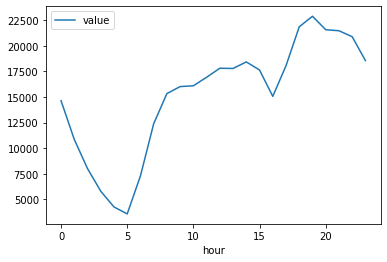

In [ ]:
df[['value','hour']].groupby('hour').mean().plot()

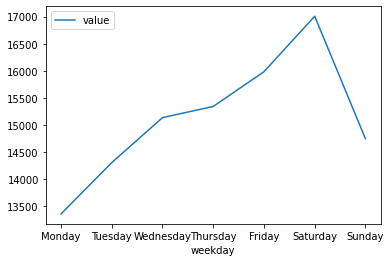

In [ ]:
df[['value','weekday']].groupby('weekday').mean().plot()

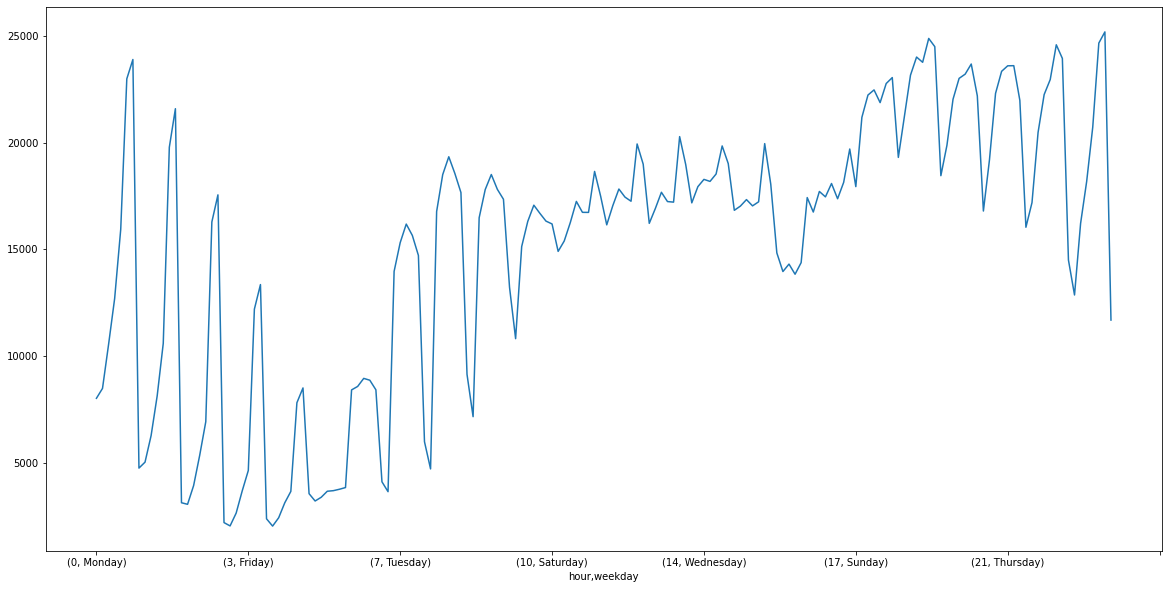

In [25]:
plt.figure(figsize=(20,10))
df.groupby(['hour', 'weekday']).mean()['value'].plot()

<Figure size 2160x720 with 0 Axes>

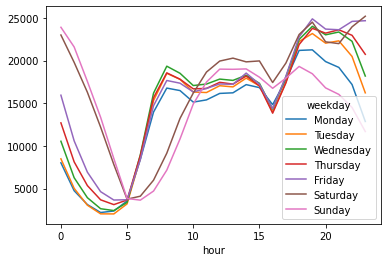

In [24]:
plt.figure(figsize=(30,10))
df.groupby(['hour', 'weekday']).mean()['value'].unstack().plot()

In [22]:
df_final=df.join(df.groupby(['hour', 'weekday'])['value'].mean(), on=['hour','weekday'], rsuffix='_avg')
df_final

,timestamp,value,hour,weekday,value_avg
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065
...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613


Anomalous Point

```
NYC Marathon - 2014-11-02
Thanksgiving - 2014-11-27
Christmas - 2014-12-25
New Years - 2015-01-01
Snow Blizzard - 2015-01-26 and 2015-01-27```



In [26]:
df_final.set_index('timestamp').loc['2014-11-02']

,value,hour,weekday,value_avg
timestamp,,,,
2014-11-02 00:00:00,24109.5,0,Sunday,23898.733333
2014-11-02 01:00:00,37204.5,1,Sunday,21593.533333
2014-11-02 02:00:00,12754.5,2,Sunday,17555.266667
2014-11-02 03:00:00,8955.5,3,Sunday,13350.550000
2014-11-02 04:00:00,5453.5,4,Sunday,8506.500000
2014-11-02 05:00:00,5174.0,5,Sunday,3837.450000
2014-11-02 06:00:00,4920.0,6,Sunday,3643.983333
2014-11-02 07:00:00,5592.0,7,Sunday,4711.300000
2014-11-02 08:00:00,7525.5,8,Sunday,7159.516667


In [27]:
df_final.set_index('timestamp').loc['2015-01-26':'2015-01-27']

,value,hour,weekday,value_avg
timestamp,,,,
2015-01-26 00:00:00,5907.0,0,Monday,8020.283333
2015-01-26 01:00:00,3649.5,1,Monday,4749.750000
2015-01-26 02:00:00,2310.0,2,Monday,3125.800000
2015-01-26 03:00:00,1949.5,3,Monday,2195.133333
2015-01-26 04:00:00,2165.5,4,Monday,2373.166667
2015-01-26 05:00:00,3723.0,5,Monday,3550.800000
2015-01-26 06:00:00,9146.0,6,Monday,8414.566667
2015-01-26 07:00:00,15835.5,7,Monday,13968.766667
2015-01-26 08:00:00,18804.5,8,Monday,16774.483333


In [28]:
df_final['day']=df.timestamp.dt.weekday

In [29]:
df_final

,timestamp,value,hour,weekday,value_avg,day
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677,1
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548,1
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903,1
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645,1
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065,1
...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968,5
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065,5
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935,5
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613,5


In [30]:
data = df_final[['value', 'hour', 'day']]

In [31]:
model =  IsolationForest(contamination=0.005, max_features=3, max_samples=0.8, n_estimators=200)
model.fit(data)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.005,
                max_features=3, max_samples=0.8, n_estimators=200, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

In [32]:
df_final['outliers']=pd.Series(model.predict(data)).apply(lambda x: 'yes' if (x == -1) else 'no' )

In [33]:
df_final.query('outliers=="yes"')

,timestamp,value,hour,weekday,value_avg,day,outliers
1488,2014-09-01 00:00:00,13763.0,0,Monday,8020.283333,0,yes
1631,2014-09-06 23:00:00,29418.5,23,Saturday,25192.516129,5,yes
2640,2014-10-19 00:00:00,27146.5,0,Sunday,23898.733333,6,yes
2977,2014-11-02 01:00:00,37204.5,1,Sunday,21593.533333,6,yes
4271,2014-12-25 23:00:00,7977.5,23,Thursday,20732.241935,3,yes
4416,2015-01-01 00:00:00,25850.0,0,Thursday,12698.500000,3,yes
4417,2015-01-01 01:00:00,29292.0,1,Thursday,8132.564516,3,yes
4418,2015-01-01 02:00:00,25753.5,2,Thursday,5350.209677,3,yes
4419,2015-01-01 03:00:00,22067.0,3,Thursday,3683.177419,3,yes
4511,2015-01-04 23:00:00,8402.0,23,Sunday,11686.450000,6,yes


Anomalous Point

```
NYC Marathon - 2014-11-02
Thanksgiving - 2014-11-27
Christmas - 2014-12-25
New Years - 2015-01-01
Snow Blizzard - 2015-01-26 and 2015-01-27```



In [34]:
df_final

,timestamp,value,hour,weekday,value_avg,day,outliers
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677,1,no
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548,1,no
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903,1,no
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645,1,no
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065,1,no
...,...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968,5,no
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065,5,no
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935,5,no
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613,5,no


In [35]:
fig = px.scatter(df_final, x='timestamp', y='value', color='outliers', hover_data=['weekday','hour','value_avg'], title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

model_decision_function() gives you score instead of 1 0r -1.

In [36]:
score=model.decision_function(data)

In [37]:
score

array([0.1064084 , 0.14624986, 0.16663447, ..., 0.14561792, 0.11634174,
       0.09733991])

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,
          0.,   0.,   1.,   2.,   2.,   4.,   2.,   4.,   1.,   6.,   3.,
          6.,  10.,  11.,  18.,  21.,  24.,  34.,  34.,  53.,  85., 100.,
         99., 125., 130., 229., 263., 272., 351., 405., 467., 494., 455.,
        406., 343., 200., 204., 193.,  99.]),
 array([-1.49749045e-01, -1.42616312e-01, -1.35483579e-01, -1.28350847e-01,
        -1.21218114e-01, -1.14085381e-01, -1.06952649e-01, -9.98199160e-02,
        -9.26871834e-02, -8.55544507e-02, -7.84217181e-02, -7.12889854e-02,
        -6.41562528e-02, -5.70235201e-02, -4.98907875e-02, -4.27580548e-02,
        -3.56253221e-02, -2.84925895e-02, -2.13598568e-02, -1.42271242e-02,
        -7.09439152e-03,  3.83411343e-05,  7.17107379e-03,  1.43038064e-02,
         2.14365391e-02,  2.85692718e-02,  3.57020044e-02,  4.28347371e-02,
         4.99674697e-02,  5.71002024e-02,  6.42329350e-02,  7.13656677e-02,
         7.84984003e-02,  8.56311330e-02,  9.27638

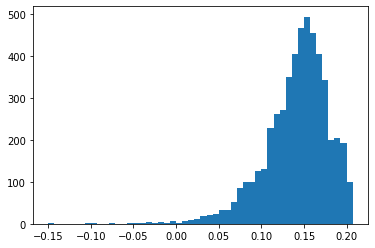

In [38]:
plt.hist(score, bins=50)

In [39]:
df_final['scores'] = score

In [40]:
df_final

,timestamp,value,hour,weekday,value_avg,day,outliers,scores
0,2014-07-01 00:00:00,9485.5,0,Tuesday,8483.709677,1,no,0.106408
1,2014-07-01 01:00:00,5433.0,1,Tuesday,5028.193548,1,no,0.146250
2,2014-07-01 02:00:00,3346.5,2,Tuesday,3052.112903,1,no,0.166634
3,2014-07-01 03:00:00,2216.5,3,Tuesday,2039.580645,1,no,0.168622
4,2014-07-01 04:00:00,2189.5,4,Tuesday,2031.258065,1,no,0.173190
...,...,...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,24501.870968,5,no,0.021296
5156,2015-01-31 20:00:00,24138.0,20,Saturday,22193.758065,5,no,0.148347
5157,2015-01-31 21:00:00,24194.5,21,Saturday,21983.241935,5,no,0.145618
5158,2015-01-31 22:00:00,26515.0,22,Saturday,23949.951613,5,no,0.116342


In [41]:
df_final.query('scores<-0.02')

,timestamp,value,hour,weekday,value_avg,day,outliers,scores
1488,2014-09-01 00:00:00,13763.0,0,Monday,8020.283333,0,yes,-0.026639
1631,2014-09-06 23:00:00,29418.5,23,Saturday,25192.516129,5,yes,-0.033168
2640,2014-10-19 00:00:00,27146.5,0,Sunday,23898.733333,6,yes,-0.020988
2977,2014-11-02 01:00:00,37204.5,1,Sunday,21593.533333,6,yes,-0.149749
4271,2014-12-25 23:00:00,7977.5,23,Thursday,20732.241935,3,yes,-0.025584
4416,2015-01-01 00:00:00,25850.0,0,Thursday,12698.500000,3,yes,-0.040697
4417,2015-01-01 01:00:00,29292.0,1,Thursday,8132.564516,3,yes,-0.095463
4418,2015-01-01 02:00:00,25753.5,2,Thursday,5350.209677,3,yes,-0.044942
4511,2015-01-04 23:00:00,8402.0,23,Sunday,11686.450000,6,yes,-0.030301
5035,2015-01-26 19:00:00,4565.5,19,Monday,21255.900000,0,yes,-0.029814


-----------------